Path: ['A', 'C', 'D', 'E', 'G']
Total Cost: 17


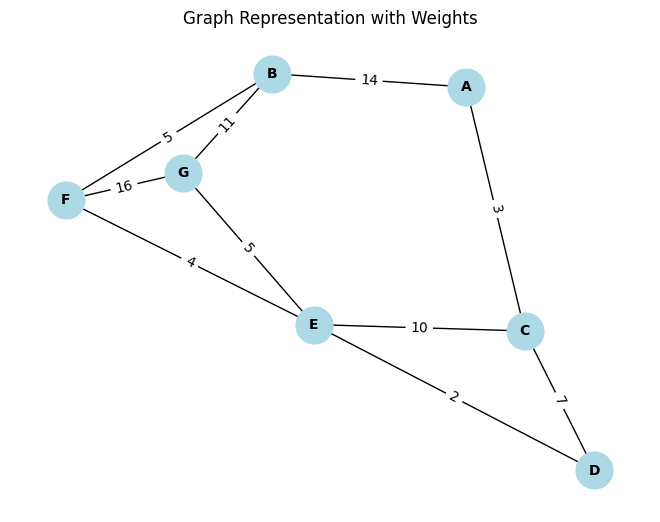

In [3]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt


graph = {
    'A': [('B', 14), ('C', 3)],
    'B': [('A', 14), ('F', 5), ('G', 11)],
    'C': [('A', 3), ('E', 10), ('D', 7)],
    'D': [('C', 7), ('E', 2)],
    'E': [('C', 10), ('F', 4), ('D', 2), ('G', 5)],
    'F': [('B', 5), ('E', 4), ('G', 16)],
    'G': [('B', 11), ('E', 5), ('F', 16)]
}


heuristic = {
    'A': 14, 'B': 12, 'C': 11,
    'D': 6, 'E': 4, 'F': 11,
    'G': 0
}


def a_star_search(start, goal):
    open_list = []
    heapq.heappush(open_list, (0 + heuristic[start], start))
    came_from = {}
    g_score = {node: float('inf') for node in graph}
    g_score[start] = 0

    while open_list:
        _, current = heapq.heappop(open_list)


        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1], g_score[goal]


        for neighbor, cost in graph[current]:
            tentative_g_score = g_score[current] + cost
            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score = tentative_g_score + heuristic[neighbor]
                heapq.heappush(open_list, (f_score, neighbor))

    return None, float('inf')


path, cost = a_star_search('A', 'G')
print("Path:", path)
print("Total Cost:", cost)


G = nx.Graph()

for node, edges in graph.items():
    for neighbor, weight in edges:
        G.add_edge(node, neighbor, weight=weight)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue", font_size=10, font_weight="bold")
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Graph Representation with Weights")
plt.show()
